# Merging Datasets from Various Sources

There are two data sets that we will be merging. The first dataset contains flight information and the second dataset has weather information. 

## Loading modules

In [1]:
import pandas as pd
import numpy as np
% pylab inline

Populating the interactive namespace from numpy and matplotlib


## Setting data frame display

In [2]:
pd.set_option('display.max_columns', None)

## Loading on-time on-performance flight data

This data was downloaded from the [Bureau of Transportation Statisitcs](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time). This website allows to download data for one month at a time. In this capstone project, we are interested in the data collected during years 2015-2016, so we  downloaded 24 files (for 24 months). We also downloaded additional 4 months of data: (i) December 2014, (ii) January 2017, (iii) February 2017, and (iv) March 2017. We are not going to use these additional four months in training or testing the machine learning models. The additional data is downloaded just to keep a buffer around, to obtain some historical information, which we will discuss shortly below. All 28 files (for 28 months) were concatenated. The ipython notebook for doing this can be located here: /springboard-datascience-intensive/capstone_project/Data/FlightData/ConcatenateAllData.ipynb. These 28 downloaded files are not added in above directory. These files can be simply downloaded from the link provided above (make sure to check on "Prezipped File" to download all columns). Note that the orginal downloaded files had lot of information on flight diversions such as diverted airport, time spent at each diversions etc. We removed those fileds in the notebook mentioned above. We just kept the information about whether the flight was diverted or not. So, after running that python notebook (ConcatenateAllData.ipynb), we get the following csv file: "../Data/FlightData/OnTime_OnPerformance_Dec2014-Mar2017.csv". Let us load that file.

In [3]:
df = pd.read_csv("../Data/FlightData/OnTime_OnPerformance_Dec2014-Mar2017.csv")

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(13263051, 67)

In [5]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest
0,0,2014,4,12,24,3,2014-12-24,US,20355,US,N655AW,1852,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,530,531.0,1.0,1.0,0.0,0.0,0001-0559,18.0,549.0,634.0,5.0,631,639.0,8.0,8.0,0.0,0.0,0600-0659,0.0,NaN,0.0,61.0,68.0,45.0,1.0,130.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,1,2014,4,12,24,3,2014-12-24,US,20355,US,N524UW,1853,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,745,748.0,3.0,3.0,0.0,0.0,0700-0759,17.0,805.0,948.0,6.0,1014,954.0,-20.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,269.0,246.0,223.0,1.0,1587.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2,2014,4,12,24,3,2014-12-24,US,20355,US,N524UW,1853,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1135,1132.0,-3.0,0.0,0.0,-1.0,1100-1159,20.0,1152.0,1136.0,7.0,1150,1143.0,-7.0,0.0,0.0,-1.0,1100-1159,0.0,NaN,0.0,75.0,71.0,44.0,1.0,255.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,3,2014,4,12,24,3,2014-12-24,US,20355,US,N915US,1854,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1555,1605.0,10.0,10.0,0.0,0.0,1500-1559,17.0,1622.0,2141.0,6.0,2144,2147.0,3.0,3.0,0.0,0.0,2100-2159,0.0,NaN,0.0,229.0,222.0,199.0,1.0,1773.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,4,2014,4,12,24,3,2014-12-24,US,20355,US,N578UW,1854,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,1240,1250.0,10.0,10.0,0.0,0.0,1200-1259,11.0,1301.0,1449.0,8.0,1452,1457.0,5.0,5.0,0.0,0.0,1400-1459,0.0,NaN,0.0,72.0,67.0,48.0,1.0,338.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


Each row in the data frame corresponds to a unique flight with details such as flight date, carrier name, origin airport, destination airport, departure time, arrival time, and all other on-performance data. ***There were more than 13 million flights in those 28 months***. We have total 67 fields in the dataset. The first column is a by product while concatinating all months data, so that can be ignored.


Let us now discuss about extracting some historical information about the flights and add new columns. This can also be thought of as doing feature engineering even before exploratory data analysis. In this exercise, we want to get some historical data about each flight. The historical data may contain information about flight delays, cancellation etc in last few days. For example, for a JFK-LAX flight on June 24th 2015, 9 PM (there might not be such flight, its just a hypothetical case to give an example), we would like to know that how many times this "exact" same flight or "unique" flight was cancelled in last 10 days. What we mean by "unique" flight is the following. A unique flight can be defined in terms of a unique origin-destination pair, a unique airline carrier, and a unique departure timing window. To explain this better,let us say that there are 100 flights from JFK to LAX on June 24th 2015, 5 of which are operated by American Airlines. Each of these American Airlines flights are separated by roughly 5 hours, say at 1 AM, 6 AM, 11 AM, 4 PM and 9 PM. This means that there are 5 unique flights of AA daily going from JFK to LAX. If we want to know the history of AA flight going from JFK to LAX on June 24th 2015, 9 PM, then we will look for the data for "this unique" flight from June 14th to June 23rd. This filtered datt frame will then be aggregated to get some meaningful numbers.


Ok, so there are 4 variables that define the uniqueness of each flight: (i) Carrier, (ii) Origin, (iii) Destination, and (iv) Departure time window. We are going to perform the following steps to achieve our goal of getting historical data for all flights:

1. Loop through each row

2. For that selected row, get (i) Carrier, (ii) Origin, (iii) Destination, and (iv) Departure time window

3. Also, store the date of the flight for this row, lets call it "thisDate"

4. Filter the whole data frame based on those 4 values (found in step 2)

4. The filtered data frame covers data for all dates during the 28 months, so we filter the filtered data further to get a data frame with only those dates that are "ndays" prior to "thisDate". Here, "ndays" is the number of days that we want to calculate the history for. In above example, we picked nday = 10.

5. Finally, we use the ndays filtered data frame and perform some aggregations such as count of cancelled flights, median of departure delays etc, and store the aggregated results. We calculate total 9 aggregated results. These aggregated results are then added to new columns. 


There are some parameters that we need to choose before doing this calculation: 


(i) ndays: Number of days that we want to calculate the history for.

(ii) time_limit: This is used to set a window around the CRS departure time, and get departure time window mentioned in step 2 above. If time_limit = 120 and CRS departure time is 09:20 AM, then we are saying that the departure time window is 07:20 - 11:20 AM. So for example, while filtering the data frame for the JFK - LAX flight operated by AA on June 24th 2015, whose CRS departure time is 09:00 PM, we will look for all the AA flights (JFK-LAX) that had CRS departure time between 07:00 - 11:00 PM for last ndays.  


We have discussed enough about the idea, lets now think about implementing it and getting the historical data.


The code which implements this idea can be located here: /springboard-datascience-intensive/capstone_project/DataMerging/history_calc.ipynb

We used three values of ndays: 10, 20 and 30 days. For each one of these we generated 9 columns. So, we will have 27 new columns. After running the history_calc.ipynb, we get a new csv file called "OnTime_OnPerformance_Dec2014-Mar2017_WithHistory_Window60mins.csv", which can be located here: /springboard-datascience-intensive/capstone_project/Data/FlightData/OnTime_OnPerformance_Dec2014-Mar2017_WithHistory_Window60mins.csv


Let us load this "enhanced" data file, and delete the original data frame.

## Loading on-time on-performance flight data "with historical information"

In [6]:
del df

In [3]:
df = pd.read_csv("../Data/FlightData/OnTime_OnPerformance_Dec2014-Mar2017_WithHistory_Window60mins.csv")

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(13263051, 95)

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30
0,0,0,2014,4,12,24,3,2014-12-24,US,20355,US,N655AW,1852,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37,North Carolina,36,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,530,531.0,1.0,1.0,0.0,0.0,0001-0559,18.0,549.0,634.0,5.0,631,639.0,8.0,8.0,0.0,0.0,0600-0659,0.0,NaN,0.0,61.0,68.0,45.0,1.0,130.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9,-1.0,7.0,-7.0,9.0,14.0,6.0,0.0,0.0,16,-3.0,7.0,-10.0,9.0,12.0,5.5,0.0,0.0,19,-3.0,21.0,-11.0,15.0,13.0,5.0,0.0,0.0
1,1,1,2014,4,12,24,3,2014-12-24,US,20355,US,N524UW,1853,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,745,748.0,3.0,3.0,0.0,0.0,0700-0759,17.0,805.0,948.0,6.0,1014,954.0,-20.0,0.0,0.0,-2.0,1000-1059,0.0,NaN,0.0,269.0,246.0,223.0,1.0,1587.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,10,-2.0,40.0,-6.0,29.0,13.5,19.0,0.0,0.0,20,-4.5,40.0,-8.0,29.0,14.5,21.0,0.0,0.0,23,-5.0,40.0,-8.0,29.0,14.0,19.0,0.0,0.0
2,2,2,2014,4,12,24,3,2014-12-24,US,20355,US,N524UW,1853,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,1135,1132.0,-3.0,0.0,0.0,-1.0,1100-1159,20.0,1152.0,1136.0,7.0,1150,1143.0,-7.0,0.0,0.0,-1.0,1100-1159,0.0,NaN,0.0,75.0,71.0,44.0,1.0,255.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-5.0,7.0,-4.5,12.0,18.5,6.5,0.0,0.0,38,-5.0,158.0,-4.5,172.0,19.0,6.0,0.0,0.0,44,-4.5,158.0,-4.5,172.0,18.5,6.0,0.0,0.0
3,3,3,2014,4,12,24,3,2014-12-24,US,20355,US,N915US,1854,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1555,1605.0,10.0,10.0,0.0,0.0,1500-1559,17.0,1622.0,2141.0,6.0,2144,2147.0,3.0,3.0,0.0,0.0,2100-2159,0.0,NaN,0.0,229.0,222.0,199.0,1.0,1773.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-2.0,22.0,-3.5,31.0,14.5,9.5,0.0,0.0,36,-1.0,114.0,-2.0,126.0,15.5,10.0,0.0,0.0,41,-1.0,114.0,-3.0,126.0,16.0,10.0,0.0,0.0
4,4,4,2014,4,12,24,3,2014-12-24,US,20355,US,N578UW,1854,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,1240,1250.0,10.0,10.0,0.0,0.0,1200-1259,11.0,1301.0,1449.0,8.0,1452,1457.0,5.0,5.0,0.0,0.0,1400-1459,0.0,NaN,0.0,72.0,67.0,48.0,1.0,338.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,10,-0.5,26.0,4.0,28.0,14.0,7.5,0.0,0.0,20,-1.0,26.0,3.5,28.0,14.5,7.0,0.0,0.0,23,0.0,26.0,6.0,28.0,15.0,7.0,0.0,0.0


We have 28 new columns, rather than 27. That one additional column "Unnamed:0.1" can be ignored as that is just a by product of concatenation done in history calculation step. There is a small caveat in the history calculation part: we used maximum ndays = 30, so any flight's historical data whose flight date was before December 31st 2014 is not correct. In any case, we are only interested in dates January 01, 2015 to December 31st 2016, so that error does not affect our study. In fact, the reason why we downloaded the December 2014 data was simply becasue we wanted to get historical data for January 2015. So, let us ignore 2014 data, and also 2017 data. 

## Focusing on only 2015-2016 flight data

In [6]:
df = df[(df.Year == 2015) | (df.Year == 2016)]

In [7]:
df.shape

(11436737, 95)

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30
477183,477183,477183,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,7.0,0.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-5.5,59.0,24.0,9.0,0.0,0.0,48,-4.0,41.0,-12.0,59.0,23.0,10.0,0.0,0.0,78,-4.0,41.0,-11.5,59.0,22.0,11.0,0.0,0.0
477184,477184,477184,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,-10.0,0.0,0.0,-1.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-2.5,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-8.0,59.0,24.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0
477185,477185,477185,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,21,-3.0,9.0,0.0,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-6.0,59.0,23.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0
477186,477186,477186,2015,1,1,4,7,2015-01-04,AA,19805,AA,N791AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,14.0,907.0,1159.0,19.0,1230,1218.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,385.0,352.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,22,-3.5,9.0,3.0,59.0,23.0,9.0,0.0,0.0,47,-4.0,41.0,-5.0,59.0,23.0,10.0,0.0,0.0,77,-4.0,41.0,-13.0,59.0,22.0,11.0,0.0,0.0
477187,477187,477187,2015,1,1,5,1,2015-01-05,AA,19805,AA,N783AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,27.0,920.0,1158.0,24.0,1230,1222.0,-8.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,389.0,338.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,23,-4.0,17.0,7.0,59.0,23.0,9.0,0.0,0.0,47,-4.0,41.0,-4.0,59.0,24.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,23.0,11.0,0.0,0.0


In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(["index", "Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [ ]:
df.head()

## Loading weather data

In [ ]:
print("number of origin airports in the dataset: ", len(set(df.Origin)))
print("number of destination airports in the dataset: ", len(set(df.Dest)))

We use [wunderground.com API](https://www.wunderground.com/weather/api) to download hourly weather data in XML format. One API call can be used to download data for a chosen airport and a chosen date (for all hours on that date). So, if we want to get the weather data for one airport, say LAX, for two years, we would need close to $2 \times 365 = 730$ API calls. Due to some restrictions on number of API calls per day and also on API call rate (per minute), it is hard to download and parse the data for all 327 airports (listed in our data frame) for all days in 2015-2016. Therefore, we pick top 20 airports which observed the most traffic during 2015-2016.


Following is the list of those top 20 airports:

In [ ]:
df.groupby("Origin")["Origin"].count().sort_values(ascending=False).head(20)

In [ ]:
df.groupby("Dest")["Dest"].count().sort_values(ascending=False).head(20)

In [18]:
def hide_topright(ax):
    """ This function removes the top and right border lines from a figure.
    
    Parameters
    ----------
    ax : An instance of Axes
    """
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

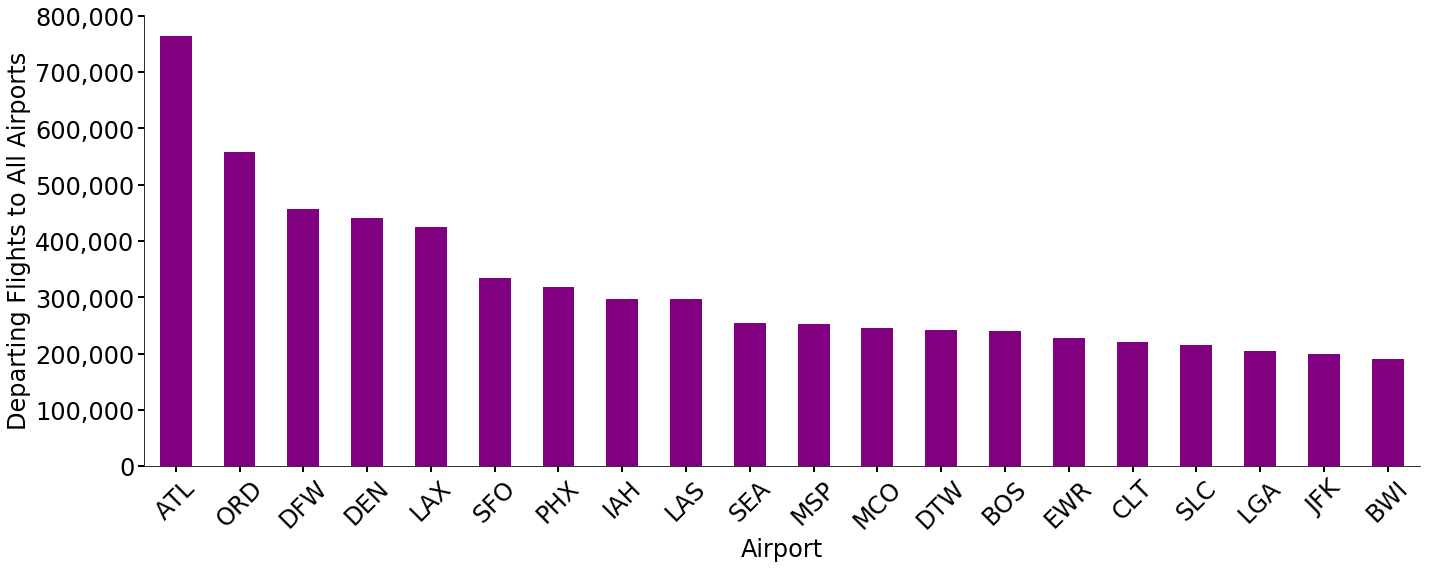

In [21]:
fs = 24
fig, ax = plt.subplots(figsize=(20,8))
ax = df.groupby("Origin")["Origin"].count().sort_values(ascending=False).head(20).plot(kind="bar", color="purple")
plt.xlabel("Airport", size = fs)
plt.ylabel("Departing Flights to All Airports", size = fs)
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.tick_params(direction='out', length=6, width=2, colors='k', labelsize=fs)
hide_topright(ax)

plt.tight_layout()
savefig('Top20.pdf')

We see exactly same top 20 list whether we sort boased on origin airport or destination airport. We downloaded the weather data for these 20 airports. The code which downloads these XML documents for a give airport and given number of days, and parse them to generate a csv file, can be located here:/springboard-datascience-intensive/capstone_project/DataMerging/weather.ipynb

So, we get one csv file for one airport. These csv files are located here:/springboard-datascience-intensive/capstone_project/Data/WeatherData/Weather_xyz_20150101-20161231.csv, where "xyz" is the airport code such as JFK, LAX, BOS, ATL etc.


Let us now load all the 20 csv files for those 20 airports and concatenate them to a single data frame.

## Concatenating weather data for all top 20 airports


Before concatenating, lets have a look at the structure of the data for one airport, say LAX:

In [29]:
dfLAX = pd.read_csv("../Data/WeatherData/Weather_LAX_20150101-20161231.csv")

In [30]:
dfLAX.shape

(17518, 28)

In [31]:
dfLAX.head()

,Unnamed: 0,Year,Month,DayOfMonth,Hour,Minute,TimeZone,Temperature,DewPoint,Humidity,WindSpeed,WindGust,WindDirection,Visibility,Pressure,WindChill,HeatIndex,Precipitation,Condition,Fog,Rain,Snow,Hail,Thunder,Tornado,Date,State,Airport
0,0,2015,1,1,0,53,America/Los_Angeles,42.1,21.9,45,3.5,-9999.0,80,10.0,30.06,40.2,-9999.0,-9999.0,Partly Cloudy,0,0,0,0,0,0,2015-01-01,CA,LAX
1,1,2015,1,1,1,53,America/Los_Angeles,39.0,25.0,57,3.5,-9999.0,110,10.0,30.07,36.8,-9999.0,-9999.0,Partly Cloudy,0,0,0,0,0,0,2015-01-01,CA,LAX
2,2,2015,1,1,2,53,America/Los_Angeles,39.0,25.0,57,3.5,-9999.0,80,10.0,30.08,36.8,-9999.0,-9999.0,Partly Cloudy,0,0,0,0,0,0,2015-01-01,CA,LAX
3,3,2015,1,1,3,53,America/Los_Angeles,39.0,25.0,57,4.6,-9999.0,110,10.0,30.08,35.7,-9999.0,-9999.0,Partly Cloudy,0,0,0,0,0,0,2015-01-01,CA,LAX
4,4,2015,1,1,4,53,America/Los_Angeles,37.0,25.0,62,8.1,-9999.0,90,10.0,30.09,31.0,-9999.0,-9999.0,Partly Cloudy,0,0,0,0,0,0,2015-01-01,CA,LAX


Let us now run a loop through all 20 airports and concatenate the data frames.

In [32]:
del dfLAX

In [33]:
# create a list of airports
airports = list(df.groupby("Dest")["Dest"].count().sort_values(ascending=False).head(20).index)
# initialize the weather data frame with the first airport in the airports list
print("Loading weather data for", airports[0])
dfw = pd.read_csv("../Data/WeatherData/Weather_"+airports[0]+"_20150101-20161231.csv")
# loop through remaining 19 airports
for airport in airports[1:]:
    print("Loading weather data for", airport)
    dfw = pd.concat([dfw, pd.read_csv("../Data/WeatherData/Weather_"+airport+"_20150101-20161231.csv")])

dfw = dfw.reset_index()
dfw = dfw.drop("index", axis=1)

Loading weather data for ATL
Loading weather data for ORD
Loading weather data for DFW
Loading weather data for DEN
Loading weather data for LAX
Loading weather data for SFO
Loading weather data for PHX
Loading weather data for IAH
Loading weather data for LAS
Loading weather data for SEA
Loading weather data for MSP
Loading weather data for MCO
Loading weather data for DTW
Loading weather data for BOS
Loading weather data for EWR
Loading weather data for CLT
Loading weather data for SLC
Loading weather data for LGA
Loading weather data for JFK
Loading weather data for BWI


In [34]:
dfw.shape

(350057, 28)

In [35]:
dfw.head()

,Unnamed: 0,Year,Month,DayOfMonth,Hour,Minute,TimeZone,Temperature,DewPoint,Humidity,WindSpeed,WindGust,WindDirection,Visibility,Pressure,WindChill,HeatIndex,Precipitation,Condition,Fog,Rain,Snow,Hail,Thunder,Tornado,Date,State,Airport
0,0,2015.0,1.0,1.0,0.0,52.0,America/New_York,37.0,28.9,73.0,4.6,-9999.0,330.0,10.0,30.36,33.3,-9999.0,-9999.0,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
1,1,2015.0,1.0,1.0,1.0,52.0,America/New_York,36.0,28.9,76.0,6.9,-9999.0,320.0,10.0,30.36,30.3,-9999.0,-9999.0,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
2,2,2015.0,1.0,1.0,2.0,52.0,America/New_York,35.1,28.0,76.0,5.8,-9999.0,330.0,10.0,30.36,30.1,-9999.0,-9999.0,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
3,3,2015.0,1.0,1.0,3.0,52.0,America/New_York,35.1,26.1,70.0,0.0,-9999.0,0.0,10.0,30.34,-999.0,-9999.0,-9999.0,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
4,4,2015.0,1.0,1.0,4.0,52.0,America/New_York,34.0,27.0,75.0,8.1,-9999.0,330.0,10.0,30.33,27.2,-9999.0,-9999.0,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL


In [36]:
dfw = dfw.drop("Unnamed: 0", 1)

Let us check if there is any missing values in dfw.

In [37]:
dfw.index[dfw.isnull().all(1)]

Int64Index([15024, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032,
            15033, 15034, 15035, 15036, 15037, 15038, 15039, 15040, 15041,
            15042, 15043, 15044, 15045, 15046, 15047],
           dtype='int64')

In [38]:
len(dfw.index[dfw.isnull().all(1)])

24

There are 24 rows where everything (every column) has missing values. We can simply delete these rows from dfw.

In [39]:
dfw = dfw.drop(dfw.index[dfw.isnull().all(1)])

In [40]:
dfw.shape

(350033, 27)

In [41]:
len(dfw.index[dfw.isnull().all(1)])

0

Once since we have the weather data, lets merge it with the flight data.

## Cleaning data frames to be prepared for merging later

Before merging these two datasets, we need to think about all the "keys" in both data frames that we will use for merging. There are three key-pairs that we should merge these data frames on:

In [42]:
from tabulate import tabulate
from IPython.display import HTML
HTML(tabulate([["FlightDate (at origin and at destination)","Date"], ["Origin/Dest","Airport"], 
               ["CRSDepTime/CRSArrTime","Hour"]], headers= ["Flight data key", "Weather data key"], tablefmt='html'))

Flight data key,Weather data key
FlightDate (at origin and at destination),Date
Origin/Dest,Airport
CRSDepTime/CRSArrTime,Hour


Let us go through these keys and check if we do have the desirable formats in both the data frames. If not, either we will modify the columns or create new ones. Also, if there are redundant columns, we will remove them.


#### Flight data key: FlightDate (at origin and at destination)

The FlightDate mentioned in a row in flight data frame corresponds to the date at the origin airport. Whats the data type for Flightdate elements? If not in timestamp format, lets convert that to timestamp format. 

In [43]:
type(df.FlightDate[0])

str

In [44]:
df["FlightDate"] = pd.to_datetime(df["FlightDate"])
type(df.FlightDate[0])

pandas._libs.tslib.Timestamp

So, we have a right format for the flight date at origin airport. For destination airport, however, there is no precise date information in the flight data frame. It is possible that flight is scheduled to start from origin airport on June 24th 2015 at 9 PM, and scheduled to arrive at the destination airport on June 25th 2015 at 3 AM. This could be due to time-zone change or due to late night flight. We should create a column for the flight date at destination airport, lets call that column as "FlightDateAtDest". We use a simple logic to create this column. Most of the time, the CRSArrTime is greater than CRSDepTime. However, when the date changes CRSDepTime becomes greater than CRSArrtime in a given row (or for a given flight). Note that the CRSDepTime and CRSArrTime are in 2400 format. 

In [45]:
df["FlightDateAtDest"] = np.where((df.CRSArrTime - df.CRSDepTime) > 0, 
                                  pd.DatetimeIndex(df.FlightDate) + pd.DateOffset(0),
                                 pd.DatetimeIndex(df.FlightDate) + pd.DateOffset(1))

Lets check few examples to see if this new column makes sense:

In [46]:
df[["FlightDate", "Origin", "Dest", "CRSDepTime", "CRSArrTime", "FlightDateAtDest"]][df.CRSDepTime > 2000].head(10)

,FlightDate,Origin,Dest,CRSDepTime,CRSArrTime,FlightDateAtDest
279,2015-01-01,LAX,JFK,2150,559,2015-01-02
280,2015-01-02,LAX,JFK,2150,559,2015-01-03
281,2015-01-03,LAX,JFK,2150,559,2015-01-04
282,2015-01-04,LAX,JFK,2150,559,2015-01-05
283,2015-01-05,LAX,JFK,2150,559,2015-01-06
284,2015-01-06,LAX,JFK,2200,617,2015-01-07
285,2015-01-07,LAX,JFK,2200,617,2015-01-08
286,2015-01-08,LAX,JFK,2200,617,2015-01-09
287,2015-01-09,LAX,JFK,2200,617,2015-01-10
288,2015-01-10,LAX,JFK,2200,617,2015-01-11


In [47]:
type(df.FlightDateAtDest[0])

pandas._libs.tslib.Timestamp

The flight dates in the flight data frame is now rightly formatted and satisfy the requirements for merging. How about the "Date" column in weather data frame? If not in right format, lets fix that.

#### Weather data key: Date

In [48]:
type(dfw.Date[0])

str

In [49]:
dfw["Date"] = pd.to_datetime(dfw["Date"])

In [50]:
type(dfw.Date[0])

pandas._libs.tslib.Timestamp

#### Flight data key: Origin/Dest


In the flight data, each row contains information about the origin airport and the destination airport. The formats for these columns are strings, so we do not need to do anything for these columns. 

In [51]:
type(df.Origin[0])

str

In [52]:
type(df.Dest[0])

str

However, we should keep in mind that we will use both columns as separate keys. In other words, we need to merge the weather data for both the origin and destination airports. 

#### Weather data key: Airport

In [53]:
type(dfw.Airport[0])

str

No need to format this column from dfw too. This is the key from dfw for airport location that we will be using to merge on to flight data frame.

#### Flight data key: CRSDepTime/CRSArrTime

For each flight we know the CRS departure and CRS arrival times. However, as we will see below, we have "Hour" information in the weather data. So, we will create two columns: "CRSDepHr" and "CRSArrHr" in the flight data frame now. 

In [54]:
df["CRSDepHr"] = df.CRSDepTime // 100

In [55]:
df["CRSArrHr"] = df.CRSArrTime // 100

In [56]:
df["CRSArrHr"][df["CRSArrHr"] == 24] = 0

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
type(df.CRSDepHr[0])

numpy.int64

In [58]:
type(df.CRSArrHr[0])

numpy.int64

Since, CRSDepHr and CRSArrHr are integers, we expect the same type for "Hour" in the weather data frame as that's the key we will be using for merging. Lets check that. 

In [59]:
type(dfw.Hour[0])

numpy.float64

Lets convert this into integers too.

In [60]:
dfw.Hour = dfw.Hour.astype(int)

In [61]:
type(dfw.Hour[0])

numpy.int64

Having formatted all required columns, and new columns, we are now in the position to merge the two data frames, except two last issues to be addressed. 

1. We have the weather data for 20 airports but the flight data is for 327 airports. To avoid lots of missing values and also to make this project "less data intensive", we now filter the flight data frame such that we only have those top 20 airports.

2. There are some columns in weather data frame ["Year", "Month", "DayOfMonth"] which are also there in the flight data frame. We are not using these columns as "keys" fir merging operation, so we can drop these columns.


Lets address the first issue first:


#### Issue 1:

In [62]:
dfw

,Year,Month,DayOfMonth,Hour,Minute,TimeZone,Temperature,DewPoint,Humidity,WindSpeed,WindGust,WindDirection,Visibility,Pressure,WindChill,HeatIndex,Precipitation,Condition,Fog,Rain,Snow,Hail,Thunder,Tornado,Date,State,Airport
0,2015.0,1.0,1.0,0,52.0,America/New_York,37.0,28.9,73.0,4.6,-9999.0,330.0,10.0,30.36,33.3,-9999.0,-9999.00,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
1,2015.0,1.0,1.0,1,52.0,America/New_York,36.0,28.9,76.0,6.9,-9999.0,320.0,10.0,30.36,30.3,-9999.0,-9999.00,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
2,2015.0,1.0,1.0,2,52.0,America/New_York,35.1,28.0,76.0,5.8,-9999.0,330.0,10.0,30.36,30.1,-9999.0,-9999.00,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
3,2015.0,1.0,1.0,3,52.0,America/New_York,35.1,26.1,70.0,0.0,-9999.0,0.0,10.0,30.34,-999.0,-9999.0,-9999.00,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
4,2015.0,1.0,1.0,4,52.0,America/New_York,34.0,27.0,75.0,8.1,-9999.0,330.0,10.0,30.33,27.2,-9999.0,-9999.00,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
5,2015.0,1.0,1.0,5,52.0,America/New_York,33.1,26.1,75.0,3.5,-9999.0,310.0,10.0,30.32,30.0,-9999.0,-9999.00,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
6,2015.0,1.0,1.0,6,52.0,America/New_York,32.0,26.1,79.0,6.9,-9999.0,310.0,10.0,30.35,25.6,-9999.0,-9999.00,Partly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
7,2015.0,1.0,1.0,7,52.0,America/New_York,32.0,26.1,79.0,0.0,-9999.0,0.0,10.0,30.36,-999.0,-9999.0,-9999.00,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
8,2015.0,1.0,1.0,8,52.0,America/New_York,37.0,28.0,70.0,0.0,-9999.0,0.0,10.0,30.35,-999.0,-9999.0,-9999.00,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL
9,2015.0,1.0,1.0,9,52.0,America/New_York,43.0,27.0,53.0,0.0,-9999.0,0.0,10.0,30.36,-999.0,-9999.0,-9999.00,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,GA,ATL


In [63]:
airports

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'SFO',
 'PHX',
 'IAH',
 'LAS',
 'SEA',
 'MSP',
 'MCO',
 'DTW',
 'BOS',
 'EWR',
 'CLT',
 'SLC',
 'LGA',
 'JFK',
 'BWI']

In [64]:
df = df[df.Origin.isin(airports)]

In [65]:
df.shape

(6381385, 96)

In [66]:
df = df.reset_index()

In [67]:
df = df.drop("index", axis=1)

In [68]:
df = df[df.Dest.isin(airports)]

In [69]:
df.shape

(2857139, 96)

In [70]:
df = df.reset_index()

In [71]:
df = df.drop("index", axis=1)

#### Issue 2:

In [72]:
dfw.drop(["Year", "Month", "DayOfMonth"], axis=1, inplace=True)
dfw.shape

(350033, 24)

Let us now start merging data frames.

## Merging flight data with weather data

Let us bring the key-pair table again and list steps for merging:

In [73]:
HTML(tabulate([["FlightDate (at origin and at destination)","Date"], ["Origin/Dest","Airport"], 
               ["CRSDepTime/CRSArrTime","Hour"]], headers= ["Flight data key", "Weather data key"], tablefmt='html'))

Flight data key,Weather data key
FlightDate (at origin and at destination),Date
Origin/Dest,Airport
CRSDepTime/CRSArrTime,Hour


There are three key-pairs and we will use two steps to merge data frames:

Merging can be carried out in the following two steps:

1. Merge flight data with weather data by keeping the origin airport, origin flight date and origin CRSDepHr in mind. In other words, we will ise "Origin", "FlightDate", "CRSDepHr" keys from the flight data frame and "Airport", "Date", "Hour" keys from the weather data frame. We will use "left join" because we want to keep all the flight data and get the weather data for those flights. Lets call this merged data as merged1.

2. Merge the "merged1" with weather data by keeping the destination airport, destination flight date and destination CRSDepHr in mind. In other words, we will use "Dest", "FlightDateAtDest", "CRSArrHr" keys from the merged1 data frame and "Airport", "Date", "Hour" keys from the weather data frame. We will again use "left join" because we want to keep all the flight data and get the weather data for those flights. Lets call this merged data as merged2.

#### Step 1

In [74]:
merged1 = pd.merge(left=df, right=dfw, left_on=["FlightDate", "Origin", "CRSDepHr"],
              right_on=["Date", "Airport", "Hour"], how="left")

In [75]:
merged1.shape

(2857139, 120)

In [76]:
merged1.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,FlightDateAtDest,CRSDepHr,CRSArrHr,Hour,Minute,TimeZone,Temperature,DewPoint,Humidity,WindSpeed,WindGust,WindDirection,Visibility,Pressure,WindChill,HeatIndex,Precipitation,Condition,Fog,Rain,Snow,Hail,Thunder,Tornado,Date,State,Airport
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,7.0,0.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-5.5,59.0,24.0,9.0,0.0,0.0,48,-4.0,41.0,-12.0,59.0,23.0,10.0,0.0,0.0,78,-4.0,41.0,-11.5,59.0,22.0,11.0,0.0,0.0,2015-01-01,9,12,9.0,51.0,America/New_York,33.1,5.0,31.0,17.3,-9999.0,270.0,10.0,30.21,22.2,-9999.0,-9999.0,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,NY,JFK
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,-10.0,0.0,0.0,-1.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-2.5,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-8.0,59.0,24.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0,2015-01-02,9,12,9.0,51.0,America/New_York,41.0,18.0,40.0,20.7,-9999.0,260.0,10.0,30.24,31.6,-9999.0,-9999.0,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-02,NY,JFK
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,21,-3.0,9.0,0.0,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-6.0,59.0,23.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0,2015-01-03,9,12,9.0,51.0,America/New_York,37.0,19.0,48.0,10.4,-9999.0,70.0,10.0,30.60,29.8,-9999.0,-9999.0,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-03,NY,JFK
3,2015,1,1,4,7,2015-01-04,AA,19805,AA,N791AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,14.0,907.0,1159.0,19.0,1230,1218.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,385.0,352.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,22,-3.5,9.0,3.0,59.0,23.0,9.0,0.0,0.0,47,-4.0,41.0,-5.0,59.0,23.0,10.0,0.0,0.0,77,-4.0,41.0,-13.0,59.0,22.0,11.0,0.0,0.0,2015-01-04,9,12,9.0,51.0,America/New_York,46.9,45.0,93.0,11.5,-9999.0,200.0,10.0,29.91,-999.0,-9999.0,0.0,Overcast,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-04,NY,JFK
4,2015,1,1,5,1,2015-01-05,AA,19805,AA,N783AA,1,12478,12

In [77]:
del df

#### Step 2

In [78]:
merged2 = pd.merge(left=merged1, right=dfw, left_on=["FlightDateAtDest", "Dest", "CRSArrHr"],
              right_on=["Date", "Airport", "Hour"], how="left")

In [79]:
merged2.shape

(2857139, 144)

In [80]:
merged2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,FlightDateAtDest,CRSDepHr,CRSArrHr,Hour_x,Minute_x,TimeZone_x,Temperature_x,DewPoint_x,Humidity_x,WindSpeed_x,WindGust_x,WindDirection_x,Visibility_x,Pressure_x,WindChill_x,HeatIndex_x,Precipitation_x,Condition_x,Fog_x,Rain_x,Snow_x,Hail_x,Thunder_x,Tornado_x,Date_x,State_x,Airport_x,Hour_y,Minute_y,TimeZone_y,Temperature_y,DewPoint_y,Humidity_y,WindSpeed_y,WindGust_y,WindDirection_y,Visibility_y,Pressure_y,WindChill_y,HeatIndex_y,Precipitation_y,Condition_y,Fog_y,Rain_y,Snow_y,Hail_y,Thunder_y,Tornado_y,Date_y,State_y,Airport_y
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,7.0,0.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-5.5,59.0,24.0,9.0,0.0,0.0,48,-4.0,41.0,-12.0,59.0,23.0,10.0,0.0,0.0,78,-4.0,41.0,-11.5,59.0,22.0,11.0,0.0,0.0,2015-01-01,9,12,9.0,51.0,America/New_York,33.1,5.0,31.0,17.3,-9999.0,270.0,10.0,30.21,22.2,-9999.0,-9999.0,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,NY,JFK,12.0,53.0,America/Los_Angeles,55.0,35.1,47.0,4.6,-9999.0,0.0,10.0,30.12,-999.0,-9999.0,-9999.0,Clear,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,CA,LAX
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,-10.0,0.0,0.0,-1.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-2.5,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-8.0,59.0,24.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0,2015-01-02,9,12,9.0,51.0,America/New_York,41.0,18.0,40.0,20.7,-9999.0,260.0,10.0,30.24,31.6,-9999.0,-9999.0,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-02,NY,JFK,12.0,53.0,America/Los_Angeles,55.0,42.1,62.0,6.9,-9999.0,260.0,10.0,30.09,-999.0,-9999.0,-9999.0,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-02,CA,LAX
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,21,-3.0,9.0,0.0,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-6.0,59.0,23.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0,2015-01-03,9,12,9.0,51.0,America/New_York,37.0,19.0,48.0,10.4,-9999.0,70.0,10.0,30.60,29.8,-9999.0,-9999.0,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-03,NY,JFK,12.0,53.0,America/Los_Angeles,57.9,42.1,56.0,8.1,-9999.0,260.0,10.0,30.22,-999.0,-999

pd.merge creates column names with _x, _y when the same column names come from different data frames. In our case, we basically merged the weather data twice. We can fix this, and rename column names more appropriately.

In [81]:
merged2.columns = [w.replace('_y', '_Dest') for w in list(merged2.columns)] 
merged2.columns = [w.replace('_x', '_Origin') for w in list(merged2.columns)] 

In [82]:
merged2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,Nflights_10,DepDelayMedian_10,DepDelayMax_10,ArrDelayMedian_10,ArrDelayMax_10,TaxiOutMedian_10,TaxiInMedian_10,Ncan_10,Ndiv_10,Nflights_20,DepDelayMedian_20,DepDelayMax_20,ArrDelayMedian_20,ArrDelayMax_20,TaxiOutMedian_20,TaxiInMedian_20,Ncan_20,Ndiv_20,Nflights_30,DepDelayMedian_30,DepDelayMax_30,ArrDelayMedian_30,ArrDelayMax_30,TaxiOutMedian_30,TaxiInMedian_30,Ncan_30,Ndiv_30,FlightDateAtDest,CRSDepHr,CRSArrHr,Hour_Origin,Minute_Origin,TimeZone_Origin,Temperature_Origin,DewPoint_Origin,Humidity_Origin,WindSpeed_Origin,WindGust_Origin,WindDirection_Origin,Visibility_Origin,Pressure_Origin,WindChill_Origin,HeatIndex_Origin,Precipitation_Origin,Condition_Origin,Fog_Origin,Rain_Origin,Snow_Origin,Hail_Origin,Thunder_Origin,Tornado_Origin,Date_Origin,State_Origin,Airport_Origin,Hour_Dest,Minute_Dest,TimeZone_Dest,Temperature_Dest,DewPoint_Dest,Humidity_Dest,WindSpeed_Dest,WindGust_Dest,WindDirection_Dest,Visibility_Dest,Pressure_Dest,WindChill_Dest,HeatIndex_Dest,Precipitation_Dest,Condition_Dest,Fog_Dest,Rain_Dest,Snow_Dest,Hail_Dest,Thunder_Dest,Tornado_Dest,Date_Dest,State_Dest,Airport_Dest
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,7.0,0.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-5.5,59.0,24.0,9.0,0.0,0.0,48,-4.0,41.0,-12.0,59.0,23.0,10.0,0.0,0.0,78,-4.0,41.0,-11.5,59.0,22.0,11.0,0.0,0.0,2015-01-01,9,12,9.0,51.0,America/New_York,33.1,5.0,31.0,17.3,-9999.0,270.0,10.0,30.21,22.2,-9999.0,-9999.0,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,NY,JFK,12.0,53.0,America/Los_Angeles,55.0,35.1,47.0,4.6,-9999.0,0.0,10.0,30.12,-999.0,-9999.0,-9999.0,Clear,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-01,CA,LAX
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,-10.0,0.0,0.0,-1.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,20,-3.0,9.0,-2.5,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-8.0,59.0,24.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0,2015-01-02,9,12,9.0,51.0,America/New_York,41.0,18.0,40.0,20.7,-9999.0,260.0,10.0,30.24,31.6,-9999.0,-9999.0,Mostly Cloudy,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-02,NY,JFK,12.0,53.0,America/Los_Angeles,55.0,42.1,62.0,6.9,-9999.0,260.0,10.0,30.09,-999.0,-9999.0,-9999.0,Scattered Clouds,0.0,0.0,0.0,0.0,0.0,0.0,2015-01-02,CA,LAX
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,21,-3.0,9.0,0.0,59.0,24.0,9.0,0.0,0.0,47,-4.0,41.0,-6.0,59.0,23.0,10.0,0.0,0.0,77,-4.0,41.0,-12.0,59.0,22.0,11.0,0.0,0.0,2015-01-03,9,12,9.0,51.0,America/New_York,37.0,19.0,48.0

## Some data cleaning (and addition)

Most of the cleaning related with missing value issues will be done in a separate notebook on EDA. Here, we do some very basic cleaning, and also add some more columns to achieve a data set that we can feed to EDA notebook later.


#### Some additions
There are 5 columns ["Year", "Quarter", "Month", "DayOfWeek", "DayofMonth] that are specific to "FlightDate" at origin. We can create a same set of 5 more columns specific to "FlightDateAtDest" at destination.

In [83]:
merged2["Year_Dest"] = merged2.FlightDateAtDest.dt.year
merged2["Quarter_Dest"] = merged2.FlightDateAtDest.dt.quarter
merged2["Month_Dest"] = merged2.FlightDateAtDest.dt.month
merged2["DayOfMonth_Dest"] = merged2.FlightDateAtDest.dt.day
merged2["DayOfWeek_Dest"] = merged2.FlightDateAtDest.dt.dayofweek

#### Handling values such as -9999.0, -999 etc

In the columns associated with weather information, there are some columns that have some unusual values such as -9999.0, -999.0 for WindGust, WindChill, HeatIndex, etc.. These unusual numbers are nothing but missing values. See [here](https://www.wunderground.com/weather/api/d/docs?d=resources/phrase-glossary) for clarification. Therefore, we replace these numbers by NaN. 

In [84]:
merged2 = merged2.replace(-9999.0, np.nan)

In [85]:
merged2 = merged2.replace(-9999.00, np.nan)

In [86]:
merged2 = merged2.replace(-999.0, np.nan)

In [87]:
merged2 = merged2.replace(-999.00, np.nan)

## Saving merged data frame to a csv

In [78]:
merged2.to_csv("../Data/MergedData/FlightHistory_Weather_Jan2015-Dec2016_Top20Airports_Window60mins.csv")